# Predict Base Ball Player Salaries

## Major League Baseball Data from the 1986 and 1987 seasons.

A data frame with 322 observations of major league players on the following 20 variables.
1. AtBat: Number of times at bat in 1986
2. Hits: Number of hits in 1986
3. HmRun: Number of home runs in 1986
4. Runs: Number of runs in 1986
5. RBI: Number of runs batted in in 1986
6. Walks: Number of walks in 1986
7. Years: Number of years in the major leagues
8. CAtBat: Number of times at bat during his career
9. CHits: Number of hits during his career
10. CHmRun: Number of home runs during his career
11. CRuns: Number of runs during his career
12. CRBI: Number of runs batted in during his career
13. CWalks: Number of walks during his career
14. League: A factor with levels A and N indicating player's league at the end of 1986
15. Division: A factor with levels E and W indicating player's division at the end of 1986
16. PutOuts: Number of put outs in 1986
17. Assists: Number of assists in 1986
18. Errors: Number of errors in 1986
19. Salary: 1987 annual salary on opening day in thousands of dollars
20. NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pydot
from IPython.display import Image

In [2]:
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('Hitters.csv').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
Unnamed: 0    263 non-null object
AtBat         263 non-null int64
Hits          263 non-null int64
HmRun         263 non-null int64
Runs          263 non-null int64
RBI           263 non-null int64
Walks         263 non-null int64
Years         263 non-null int64
CAtBat        263 non-null int64
CHits         263 non-null int64
CHmRun        263 non-null int64
CRuns         263 non-null int64
CRBI          263 non-null int64
CWalks        263 non-null int64
League        263 non-null object
Division      263 non-null object
PutOuts       263 non-null int64
Assists       263 non-null int64
Errors        263 non-null int64
Salary        263 non-null float64
NewLeague     263 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 45.2+ KB


In [4]:
X = df[['Years', 'Hits']] ## df[['Years', 'Hits']].as_matrix()
y = df[["Salary"]]  ## np.log(df.Salary.as_matrix()

In [5]:
regr = DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=3, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Print decision tree

In [6]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

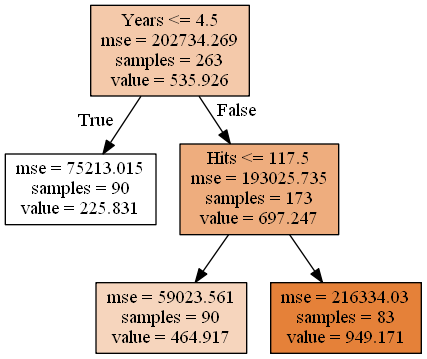

In [7]:
graph, = print_tree(regr, features=['Years', 'Hits'])
Image(graph.create_png())

In [8]:
mean_squared_error(y, regr.predict(X))

114209.18759105435

In [9]:
np.sqrt(mean_squared_error(y, regr.predict(X)))

337.9484984299447

In [10]:
regr.score(X,y)

0.43665573627391885